# Data Preprocessing
## Importation of the data

In [1]:
import pandas as pd

fdaDF = pd.read_csv('output-files/fda-ADMET-properties.csv')
worldNotFdaDF = pd.read_csv('output-files/world-not-fda-ADMET-properties.csv')
reactiveDF = pd.concat([fdaDF, worldNotFdaDF])

anodyneDF = pd.read_csv('output-files/anodyne_1-1000-ADMET-properties.csv')

A column containing a label for each molecule should be added:

In [2]:
reactiveDF['label'] = 0
anodyneDF['label'] = 1

The anodyne and the reactive molecules datasets should be concatenated:

In [3]:
df = pd.concat([reactiveDF, anodyneDF])

## Visualization of the dataset

In [4]:
df.sample(5)

,Molecule,Canonical SMILES,Formula,MW,#Heavy atoms,#Aromatic heavy atoms,Fraction Csp3,#Rotatable bonds,#H-bond acceptors,#H-bond donors,...,Ghose #violations,Veber #violations,Egan #violations,Muegge #violations,Bioavailability Score,PAINS #alerts,Brenk #alerts,Leadlikeness #violations,Synthetic Accessibility,label
3522,Molecule 23,COc1ccccc1CN[C@@H]1CCCN[C@@H]1c1ccccc1C,C20H26N2O,310.43,23,12,0.40,5,3,2,...,0,0,0,0,0.55,0,0,0,3.10,1
1573,Molecule 59,CCC[C@@]1(CCc2ccccc2)CC(=O)C(=C(O1)O)[C@@H](c1...,C31H33F3N2O5S,602.66,42,18,0.35,12,9,2,...,4,1,1,2,0.56,0,0,3,5.39,0
596,Molecule 97,COc1ccc(cc1)c1ncc2c(n1)c1C[C@]3(CCCO3)CCc1[nH]2,C20H21N3O2,335.40,25,15,0.40,2,4,1,...,0,0,0,0,0.55,0,0,0,3.95,1
7379,Molecule 80,O=C(c1cc2C=Nc3c2c(n1)c(NC(=O)C)cc3N)CC1OCCO1,C17H16N4O4,340.33,25,10,0.29,5,6,2,...,0,0,0,0,0.55,0,1,0,3.15,1
2263,Molecule 64,C[C@H]([C@H](c1cccc(c1)O)O)N,C9H13NO2,167.21,12,6,0.33,2,3,3,...,0,0,0,1,0.55,0,0,1,2.00,1


The 'Molecule' column should be removed, it doesn't hold any information, it was used as an index when the data has been retrieved from the web server. The SMILES of the molecules should be stored in another frame for later use if needed.

In [5]:
smiles = df['Canonical SMILES']
df = df.drop(['Molecule', 'Canonical SMILES'], axis=1)

Let's display the number of unique values in each columns along with their data type:

In [6]:
pd.DataFrame.from_records([(col, df[col].nunique(), df[col].dtypes) for col in df.columns],
                          columns=['Column_Name', 'Num_Unique', 'Data_Type']).sort_values(by=['Num_Unique'])

,Column_Name,Num_Unique,Data_Type
47,label,2,int64
28,GI absorption,2,object
29,BBB permeant,2,object
30,Pgp substrate,2,object
31,CYP1A2 inhibitor,2,object
32,CYP2C19 inhibitor,2,object
33,CYP2C9 inhibitor,2,object
34,CYP2D6 inhibitor,2,object
35,CYP3A4 inhibitor,2,object
39,Veber #violations,3,int64


The formulas of the molecules should be removed as there is too much unique values for this variable to be used as it is non numerical:

In [7]:
df = df.drop(['Formula'], axis=1)

The columns with an 'object' data types are possible caterogical variables. Some columns with a numerical could also be used as caterogical variables as they hold only a few unique values. Let's convert the columns holding less than 10 unique values to the 'category' data type:

In [8]:
for col in df.columns:
    if df[col].nunique() < 10 :
        df[col] = df[col].astype('category')

We can visualize an histogram of each columns against the labels:

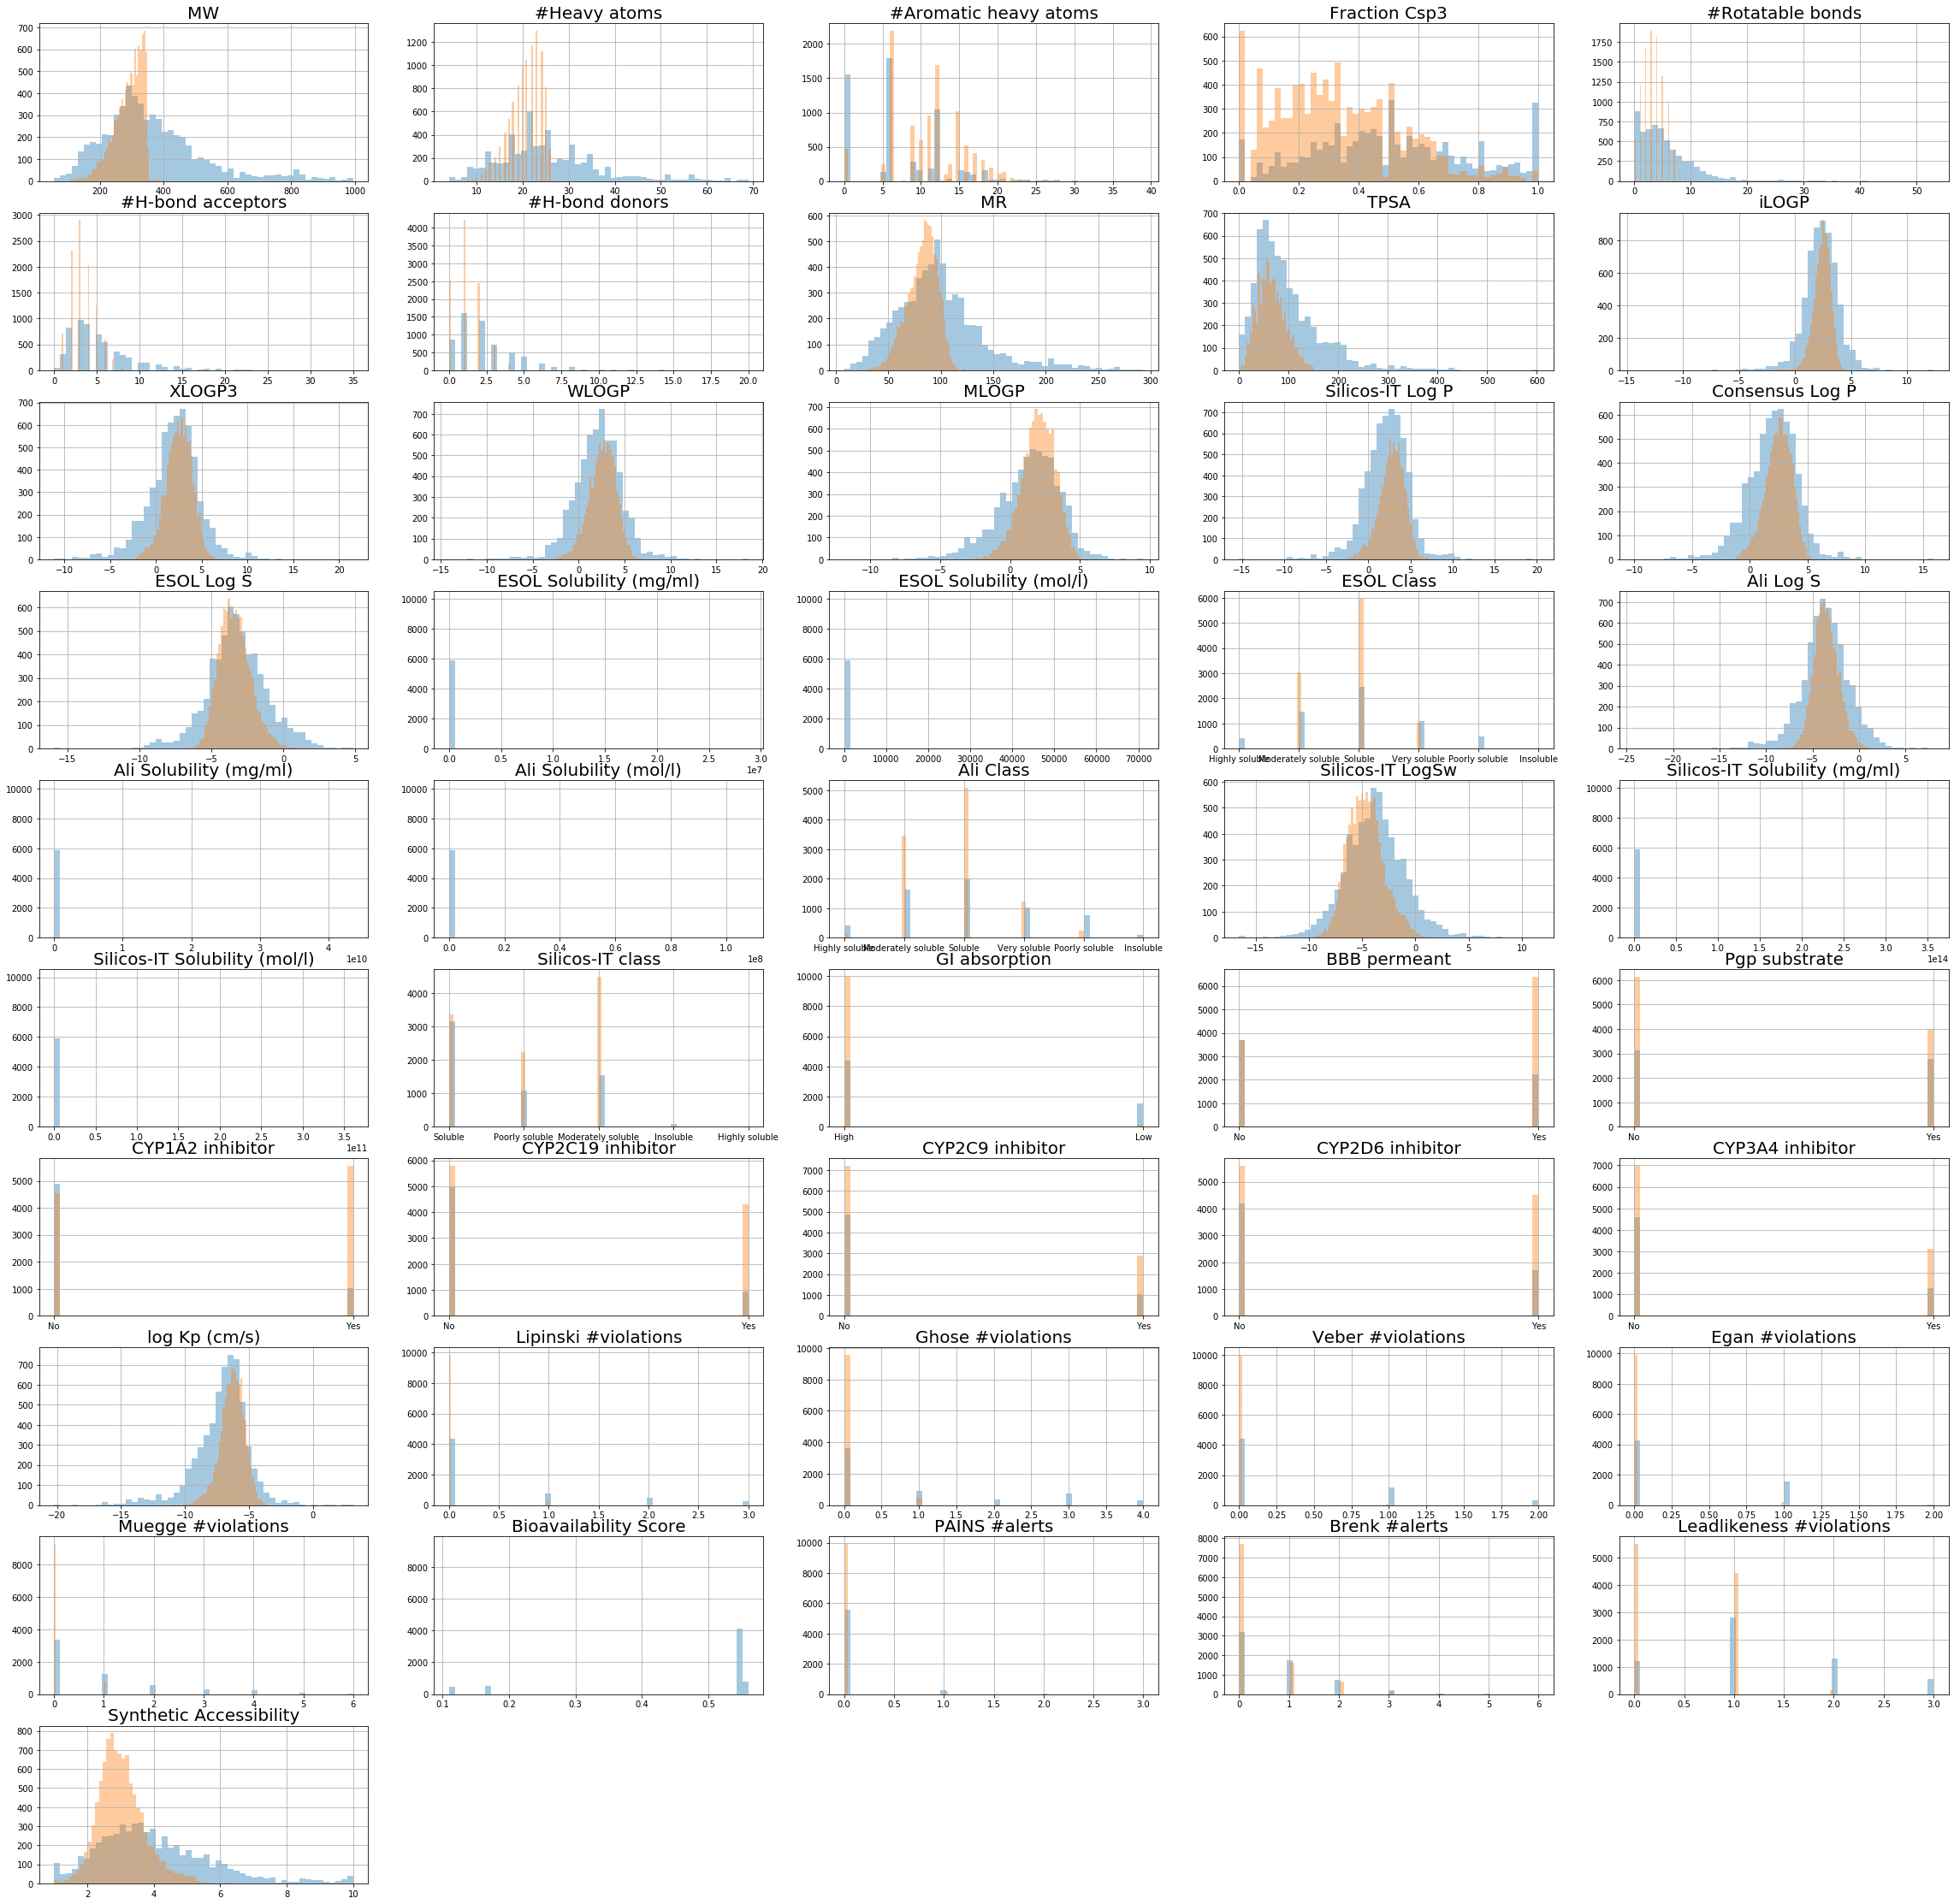

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

groupedData = df.groupby('label')

for n, col in enumerate(df.columns):
    if col != 'label':
        plt.subplot(10, 5, n + 1)
        groupedData[col].hist(figsize=(40, 40), alpha=0.4, bins=50)
        plt.title(col, fontsize=20)

Let's normalize the numerical data using min max normalization:

In [10]:
for col in df._get_numeric_data():
    df[col] = ((df[col] - df[col].min()) / (df[col].max() - df[col].min()))

Let's encode the caterogical variables using One-Hot-Enconding:

In [11]:
cols = df.select_dtypes(include=['category']).columns
for col in cols:
    df[col] = df[col].cat.codes
cols = [col for col in cols if df[col].nunique() > 2]
df = pd.get_dummies(df, columns=cols, prefix=cols)

Finally, let's separate the labels from the dataset:

In [12]:
y = df['label']
X = df.drop(['label'], axis=1)

# Training and evaluating the model

In [13]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier(n_estimators=10)
skf = StratifiedKFold(n_splits=10, shuffle=True)
cross_val_score(clf, X, y, cv=skf)

array([0.91755153, 0.91630231, 0.9225    , 0.911875  , 0.8975    ,
       0.8925    , 0.89625   , 0.921875  , 0.920625  , 0.90125   ])

In [14]:
clf.fit(X, y)
dico = dict(zip(X.columns, clf.feature_importances_))

print('+' + '-' * 30 + '+' + '-' * 20 + '+')
for col, val in sorted(dico.items(), key=lambda x: x[1]):
    print('|{:30s}|{:20f}|'.format(col, val))
    print('+' + '-' * 30 + '+' + '-' * 20 + '+')

+------------------------------+--------------------+
|Silicos-IT Solubility (mg/ml) |            0.000000|
+------------------------------+--------------------+
|Silicos-IT Solubility (mol/l) |            0.000000|
+------------------------------+--------------------+
|ESOL Class_1                  |            0.000000|
+------------------------------+--------------------+
|Silicos-IT class_0            |            0.000000|
+------------------------------+--------------------+
|Silicos-IT class_1            |            0.000000|
+------------------------------+--------------------+
|Lipinski #violations_3        |            0.000000|
+------------------------------+--------------------+
|Veber #violations_2           |            0.000000|
+------------------------------+--------------------+
|Egan #violations_2            |            0.000000|
+------------------------------+--------------------+
|Muegge #violations_4          |            0.000000|
+---------------------------